# Dataset - UCI bank marketing dataset
* The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
* The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



## Input variables:

1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8.  contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.  cons.price.idx: consumer price index - monthly indicator (numeric)
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.  euribor3m: euribor 3 month rate - daily indicator (numeric)
20.  nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21.  y - has the client subscribed a term deposit? (binary: 'yes','no')



#  EDA & KPI Visualizations

We will compute and plot an important KPI - **conversion rate** and also conversion rate for different categories of customers based on age, marital status and job.

In [ ]:
# importing necessary modules
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
df = pd.read_csv('bank-full.csv', sep = ';')

has client subscribed to term deposit? 


In [ ]:
# create a new column with 0 for not convert and 1 for convert
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0) 

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
df.shape

(45211, 18)

In [ ]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

In [ ]:
# df.drop(duration)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Aggregate Conversion Rate
total no. of clients that subscribed to a term deposit/ total no. of clients in the data

In [ ]:
# total no. of conversions
df.conversion.sum()

5289

In [ ]:
# total no. of clients in the data
df.shape[0]

45211

In [ ]:
print('total conversions : %i out of  %i' % (df.conversion.sum(), df.shape[0]))

total conversions : 5289 out of  45211


In [ ]:
print('conversion rate: %0.2f%%' %(df.conversion.sum()/df.shape[0]*100))

conversion rate: 11.70%


## Conversion rates by age

In [ ]:
conversions_by_age =  df.groupby(by = 'age')['conversion'].sum()/df.groupby(by = 'age')['conversion'].count()*100

In [ ]:
print(conversions_by_age)

age
18     58.333333
19     31.428571
20     30.000000
21     27.848101
22     31.007752
         ...    
90    100.000000
92    100.000000
93    100.000000
94      0.000000
95     50.000000
Name: conversion, Length: 77, dtype: float64


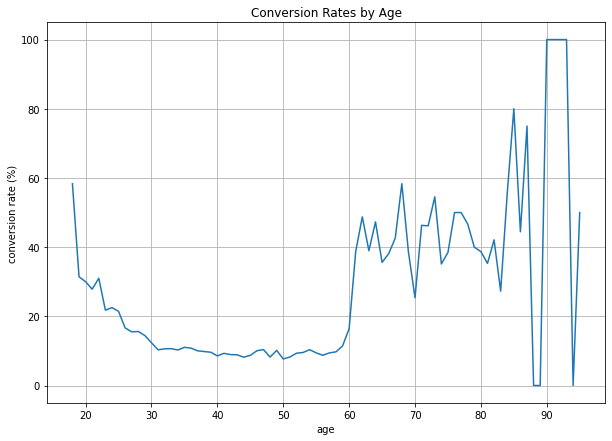

In [ ]:
# visualize as line chart
import matplotlib.pyplot as plt
ax = conversions_by_age.plot(grid = True, figsize = (10, 7),
                             title = 'Conversion Rates by Age')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [ ]:
# makes more sense to group into buckets
# use apply function on the column age to group clients into different age buckets
# and name the new column as age_group
df['age_group'] = df['age'].apply(lambda x: '[18, 30)' if x < 30
                                  else '[30, 40)' if x < 40
                                  else '[40, 50)' if x < 50
                                  else '[50, 60)' if x < 60
                                  else '[60, 70)' if x < 70
                                  else '70+')

In [ ]:
# conversion rates for age groups
conversions_by_age_group = df.groupby(by = 'age_group')['conversion'].sum()/df.groupby(by = 'age_group')['conversion'].count()*100.0

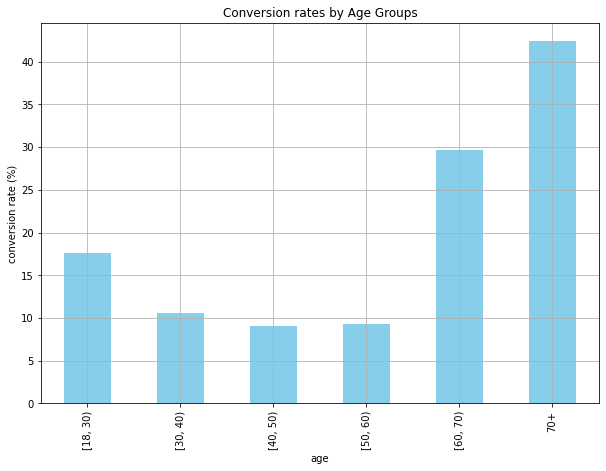

In [ ]:
# bar chart
ax = conversions_by_age_group.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(kind = 'bar', color = 'skyblue', grid = True, figsize = (10, 7),title = 'Conversion rates by Age Groups')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

## Conversions by marital status

In [ ]:
# pivot table - marital becomes the index and conversion is the column 
conversions_by_marital_status_df = pd.pivot_table(df, values = 'y', index = 'marital', columns = 'conversion', aggfunc = len)

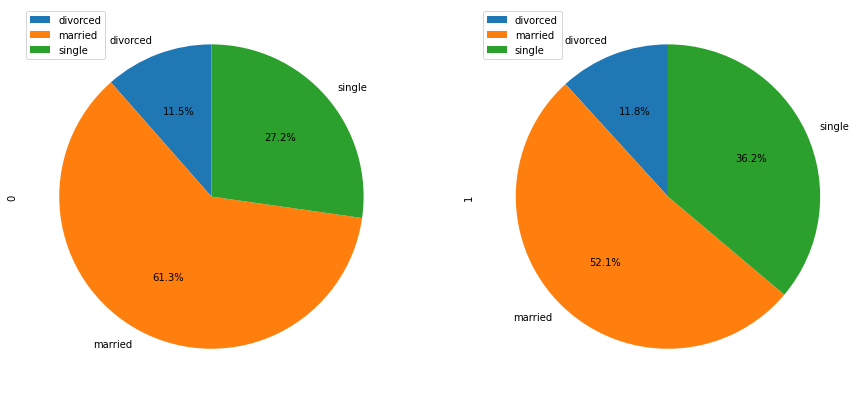

In [ ]:
conversions_by_marital_status_df.plot(kind = 'pie',
                                      figsize = (15, 7),
                                      startangle = 90,
                                      subplots = True,
                                      autopct = lambda x: '%0.1f%%' %x)
plt.show()

## Conversion rates by age and marital status

In [ ]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

In [ ]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)

In [ ]:
age_marital_df

marital,divorced,married,single
age_group,,,
70+,0.099278,0.319495,0.005415
"[18, 30)",0.002086,0.023326,0.150578
"[30, 40)",0.008735,0.050473,0.046548
"[40, 50)",0.015015,0.058172,0.018018
"[50, 60)",0.019025,0.068014,0.006302
"[60, 70)",0.051220,0.237398,0.008130


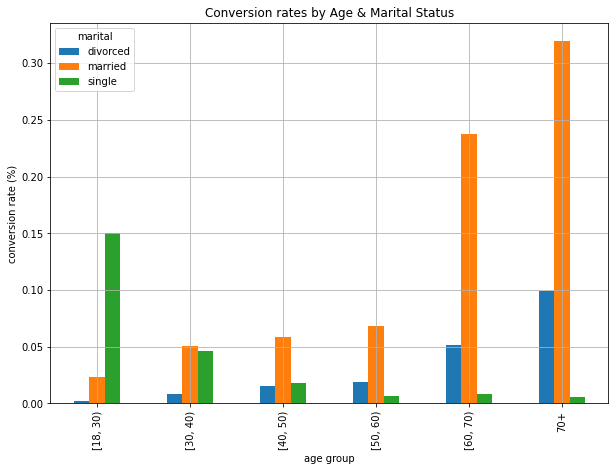

In [ ]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

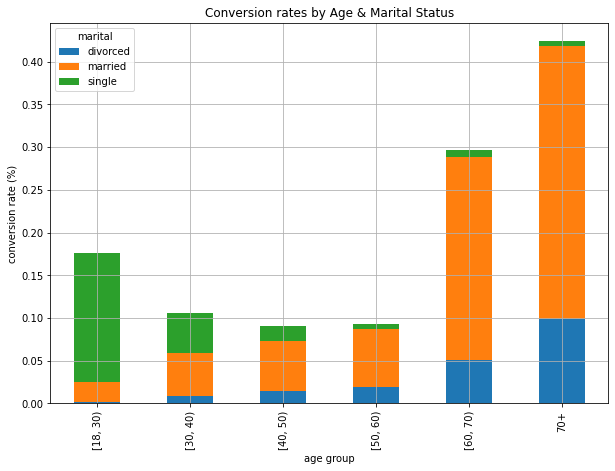

In [ ]:
# stacked bar chart
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

## Conversion rates by job

In [ ]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count() * 100.0

In [ ]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

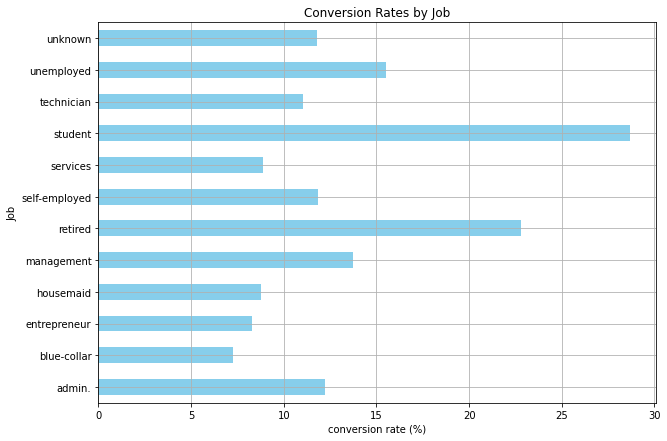

In [ ]:
ax = conversion_rate_by_job.plot(
    kind = 'barh',
    color = 'skyblue',
    grid = True,
    figsize = (10, 7),
    title = 'Conversion Rates by Job',
    )
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

## Bank balance by conversions

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


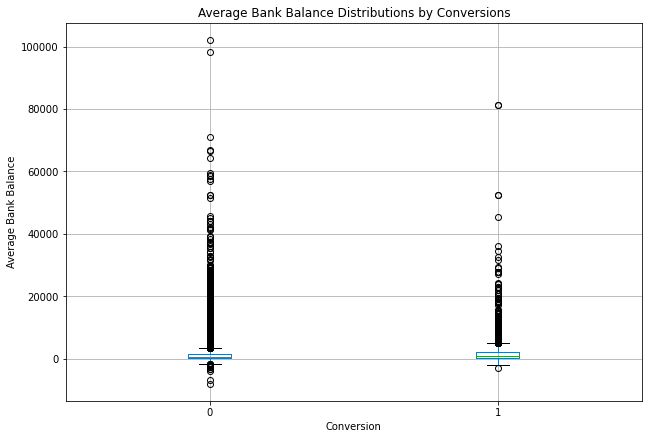

In [ ]:
ax =  df[['conversion', 'balance']].boxplot(by = 'conversion',
                                      showfliers = 'conversion',
                                      figsize = (10, 7))
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversions')
plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


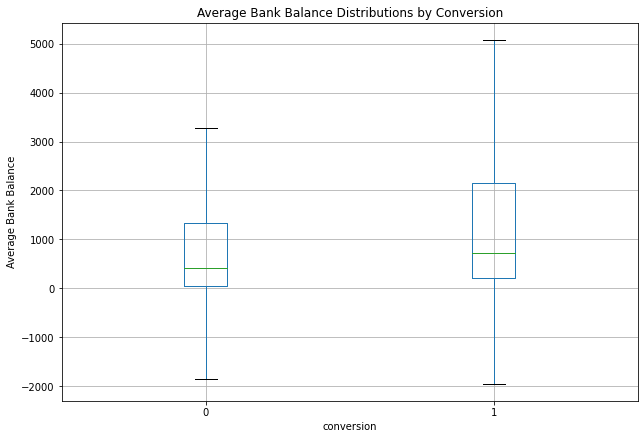

In [ ]:
ax = df[['conversion', 'balance']].boxplot(by = 'conversion',
                                           showfliers = False,
                                           figsize = (10, 7),
                                           )
ax.set_xlabel('conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

## Conversions by number of contacts

In [ ]:
conversions_by_num_contacts = df.groupby(by = 'campaign')['conversion'].sum()/df.groupby(by = 'campaign')['conversion'].count()*100.0

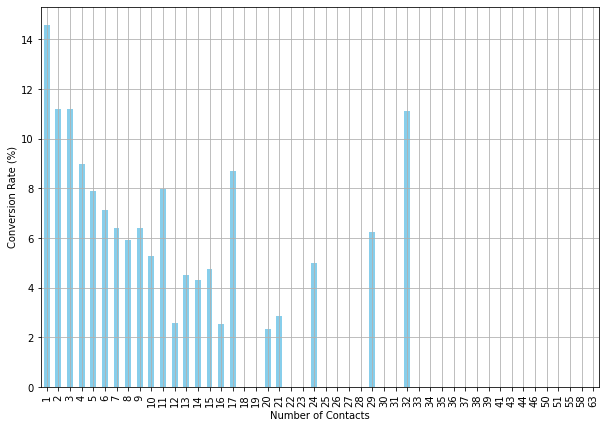

In [ ]:
ax = conversions_by_num_contacts.plot(
    kind = 'bar',
    figsize = (10, 7),
    grid = True,
    color = 'skyblue'
)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

# Encoding Categorical Variables

In [ ]:
categorical_vars = [
                    'job',
                    'marital',
                    'education',
                    'default',
                    'housing',
                    'loan',
                    'contact',
                    'month'
]

In [ ]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

## Encoding 'month'

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [ ]:
df['month'] = df['month'].apply(lambda x: months.index(x) + 1)

In [ ]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

## Encoding 'job'

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
jobs_encoded_df = pd.get_dummies(df['job'])

In [ ]:
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]
df = pd.concat([df, jobs_encoded_df], axis = 1)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0,"[50, 60)",0,0,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0,"[40, 50)",0,0,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0,"[30, 40)",0,0,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0,"[40, 50)",0,1,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0,"[30, 40)",0,0,0,0,0,0,0,0,0,0,0,1


## Encoding 'marital'

In [ ]:
marital_encoded_df = pd.get_dummies(df['marital'])

In [ ]:
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [ ]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
df = pd.concat([df, marital_encoded_df], axis = 1)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0,"[50, 60)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0,"[40, 50)",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0,"[30, 40)",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0,"[40, 50)",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0,"[30, 40)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Encoding 'loan'

In [ ]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,0,unknown,5,5,261,1,-1,0,unknown,no,0,"[50, 60)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,0,unknown,5,5,151,1,-1,0,unknown,no,0,"[40, 50)",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,1,unknown,5,5,76,1,-1,0,unknown,no,0,"[30, 40)",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,0,unknown,5,5,92,1,-1,0,unknown,no,0,"[40, 50)",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,0,unknown,5,5,198,1,-1,0,unknown,no,0,"[30, 40)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Encoding 'housing'

In [ ]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,0,unknown,5,5,261,1,-1,0,unknown,no,0,"[50, 60)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,5,151,1,-1,0,unknown,no,0,"[40, 50)",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,5,76,1,-1,0,unknown,no,0,"[30, 40)",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,5,92,1,-1,0,unknown,no,0,"[40, 50)",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,5,198,1,-1,0,unknown,no,0,"[30, 40)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Fitting Decision Tree

In [ ]:
features = ['age', 'balance', 'campaign', 'previous', 'housing'] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

In [ ]:
response_var = 'conversion'

In [ ]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [ ]:
from sklearn import tree

In [ ]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)

In [ ]:
X = df[features]
y = df[response_var]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.classes_

array([0, 1])

# Interpreting the Decision Tree Model

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(
    dt_model, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
)

In [ ]:
graph = graphviz.Source(dot_data)

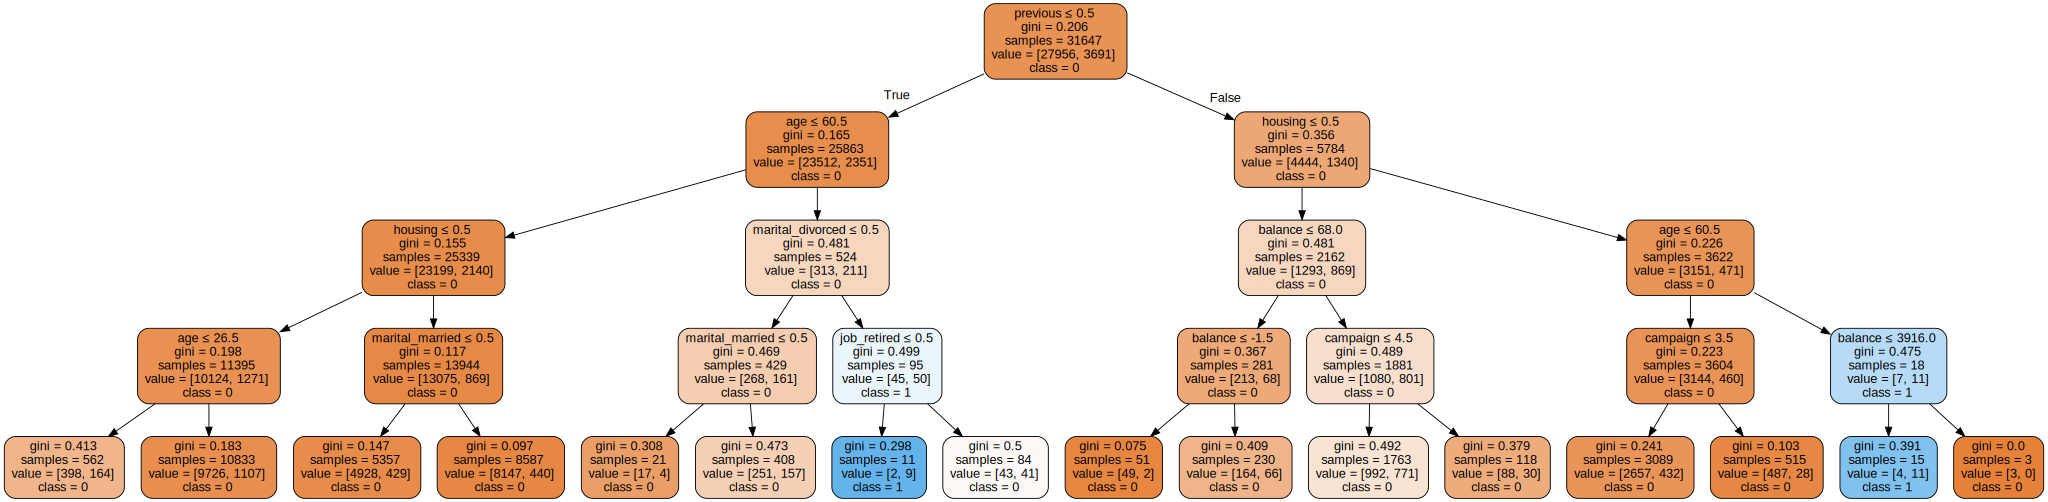

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

NameError: ignored

# To Do
* train test split
* confusion matrix
* accuracy score
* grid search cv
* feature importance
* 